# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the two DataFrames based on the common column "Mouse ID"
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the merged DataFrame to check the results
merged_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Count the number of unique mice in the merged dataset
num_unique_mice = merged_data["Mouse ID"].nunique()

# Display the number of unique mice
num_unique_mice

249

In [5]:
# Identify duplicate mice based on Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Display the duplicate mice
duplicate_mice["Mouse ID"].unique()


array(['g989'], dtype=object)

In [6]:
# Identify duplicate mice based on Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Get all the data for the duplicate mouse ID
all_duplicate_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice["Mouse ID"])]

# Display the data for the duplicate mouse ID
all_duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Drop the duplicate mouse by its ID
clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# Display the clean dataset
clean_data.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Count the number of mice in the clean dataset
num_mice = clean_data["Mouse ID"].nunique()

# Display the number of mice in the clean dataset
f"There are {num_mice} unique mice in the clean dataset."


'There are 249 unique mice in the clean dataset.'

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Calculate summary statistics of tumor volume by drug regimen
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns in the summary statistics table
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]

# Display the summary statistics table
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Calculate summary statistics of tumor volume by drug regimen using agg method
summary_stats = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Flatten the multi-level column index in the summary statistics table
summary_stats.columns = [f"{col[0]}_{col[1].upper()}" for col in summary_stats.columns]

# Display the summary statistics table
summary_stats


,Tumor Volume (mm3)_MEAN,Tumor Volume (mm3)_MEDIAN,Tumor Volume (mm3)_VAR,Tumor Volume (mm3)_STD,Tumor Volume (mm3)_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

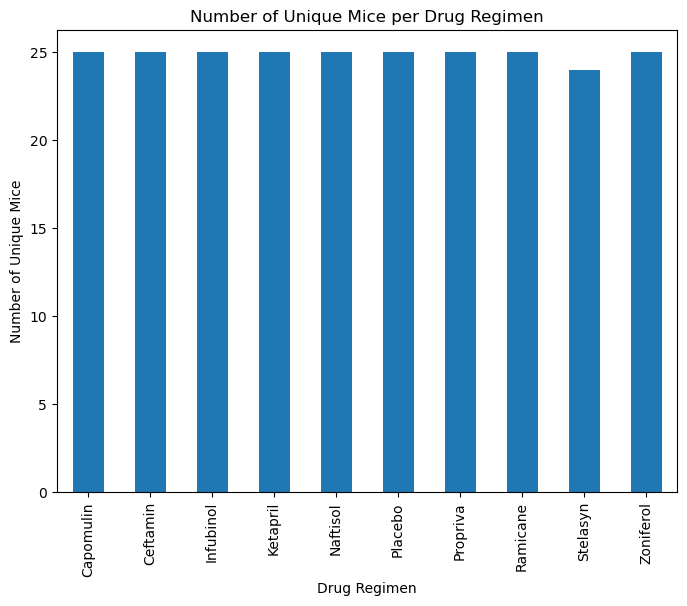

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the clean data by drug regimen and count the number of unique mouse IDs
regimen_counts = clean_data.groupby("Drug Regimen")["Mouse ID"].nunique()

# Create a bar plot of the regimen counts using Pandas
regimen_counts.plot(kind="bar", figsize=(8,6))

# Set the chart title and axis labels
plt.title("Number of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

# Display the plot
plt.show()


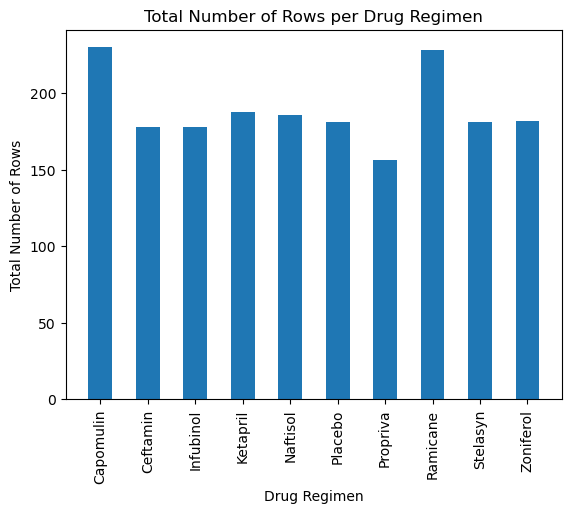

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the clean data by drug regimen and count the number of rows
regimen_counts = clean_data.groupby("Drug Regimen")["Mouse ID"].count()

# Create a bar plot of the regimen counts using pyplot
plt.bar(regimen_counts.index, regimen_counts.values, width=0.5)

# Set the chart title and axis labels
plt.title("Total Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


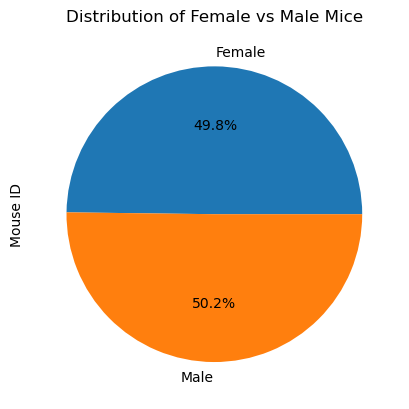

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the clean data by sex and count the number of unique mice
sex_counts = clean_data.groupby("Sex")["Mouse ID"].nunique()

# Create a pie plot of the sex counts using Pandas
sex_counts.plot(kind="pie", y="Sex", autopct="%1.1f%%")

# Set the chart title
plt.title("Distribution of Female vs Male Mice")

# Display the plot
plt.show()


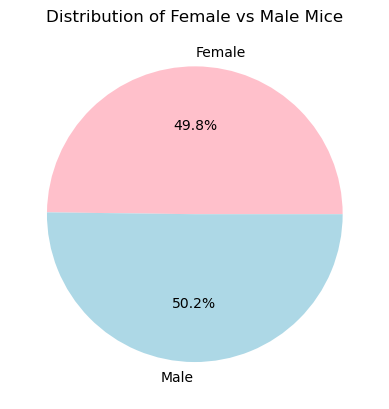

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the clean data by sex and count the number of unique mice
sex_counts = clean_data.groupby("Sex")["Mouse ID"].nunique()

# Create a list of colors for the pie chart
colors = ["pink", "lightblue"]

# Create a pie chart with the sex counts and colors
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct="%1.1f%%")

# Set the chart title
plt.title("Distribution of Female vs Male Mice")

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Get the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby("Mouse ID")["Timepoint"].max()

# Merge the last timepoints with the clean_data dataframe to get the final tumor volume for each mouse
final_volume = pd.merge(clean_data, last_timepoints, on=["Mouse ID", "Timepoint"])

# Create a list of the four treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the final_volume dataframe to include only the four treatments
final_volume_filtered = final_volume[final_volume["Drug Regimen"].isin(treatments)]

# Group the filtered dataframe by drug regimen and mouse ID and calculate the mean tumor volume
tumor_volume_mean = final_volume_filtered.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].mean()

# Convert the tumor_volume_mean Series to a DataFrame and reset the index
tumor_volume_df = tumor_volume_mean.to_frame().reset_index()

# Pivot the tumor_volume_df DataFrame to create a summary table with drug regimen as the columns and mouse ID as the index
summary_table = tumor_volume_df.pivot(index="Mouse ID", columns="Drug Regimen", values="Tumor Volume (mm3)")

# Display the summary table
summary_table.head()


In [22]:
# Create a list of the four regimens to analyze
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Loop through treatments to calculate IQR and outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment].groupby("Mouse ID")["Timepoint", "Tumor Volume (mm3)"].max().reset_index()

    # Calculate the quartiles and IQR
    quartiles = final_tumor_volume["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume["Tumor Volume (mm3)"] < lower_bound) | (final_tumor_volume["Tumor Volume (mm3)"] > upper_bound)]

    # Print results
    print(f"\nResults for {treatment}:")
    print("------------------------")
    print(f"The lower quartile of tumor volumes is: {lower_quartile:.2f}")
    print(f"The upper quartile of tumor volumes is: {upper_quartile:.2f}")
    print(f"The interquartile range of tumor volumes is: {iqr:.2f}")
    print(f"The median of tumor volumes is: {quartiles[0.5]:.2f}")
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    if outliers.empty:
        print("There are no potential outliers for this treatment.")
    else:
        print(f"The following mice may be potential outliers:\n{outliers}")
        
    # Append tumor volumes to list for plotting
    tumor_volumes.append(final_tumor_volume["Tumor Volume (mm3)"])



Results for Capomulin:
------------------------
The lower quartile of tumor volumes is: 45.00
The upper quartile of tumor volumes is: 46.75
The interquartile range of tumor volumes is: 1.75
The median of tumor volumes is: 45.89
Values below 42.38 could be outliers.
Values above 49.37 could be outliers.
There are no potential outliers for this treatment.

Results for Ramicane:
------------------------
The lower quartile of tumor volumes is: 45.00
The upper quartile of tumor volumes is: 46.34
The interquartile range of tumor volumes is: 1.34
The median of tumor volumes is: 45.52
Values below 42.98 could be outliers.
Values above 48.36 could be outliers.
There are no potential outliers for this treatment.

Results for Infubinol:
------------------------
The lower quartile of tumor volumes is: 54.05
The upper quartile of tumor volumes is: 65.53
The interquartile range of tumor volumes is: 11.48
The median of tumor volumes is: 60.17
Values below 36.83 could be outliers.
Values above 82.74 

C:\Users\noah.lemunyon\AppData\Local\Temp\ipykernel_32152\3482853154.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment].groupby("Mouse ID")["Timepoint", "Tumor Volume (mm3)"].max().reset_index()
C:\Users\noah.lemunyon\AppData\Local\Temp\ipykernel_32152\3482853154.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment].groupby("Mouse ID")["Timepoint", "Tumor Volume (mm3)"].max().reset_index()
C:\Users\noah.lemunyon\AppData\Local\Temp\ipykernel_32152\3482853154.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment].grou

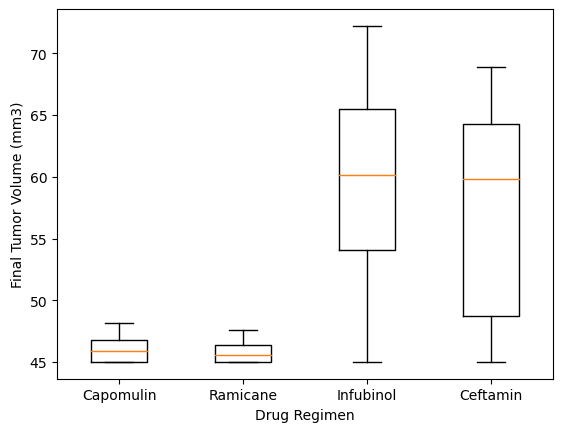

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes)
ax.set_xticklabels(treatments)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

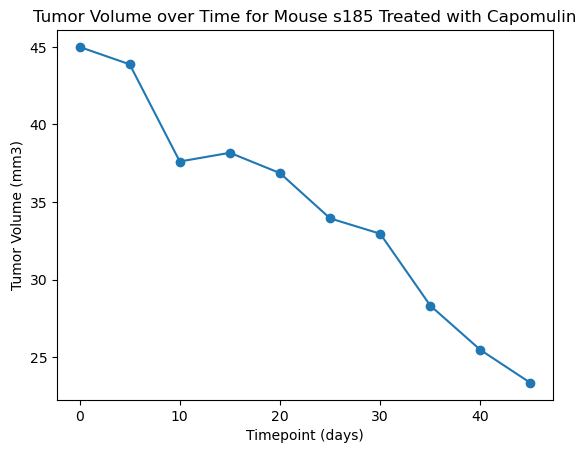

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data to only include Capomulin treatments and the specific mouse ID
capomulin_data = merged_data[merged_data["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "s185"]

# Create a line plot of tumor volume vs. time point
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')

# Add axis labels and a title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time for Mouse s185 Treated with Capomulin")

# Display the plot
plt.show()


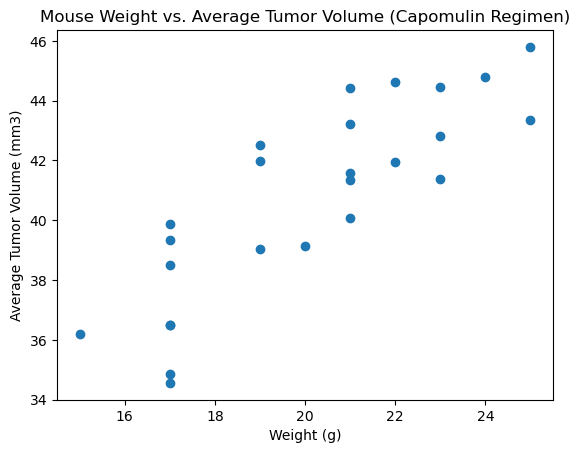

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data to include only Capomulin regimen
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse on Capomulin
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the mouse weight data
merged_weight_vol = pd.merge(mouse_metadata, avg_tumor_vol, on="Mouse ID")

# Generate the scatter plot
plt.scatter(merged_weight_vol["Weight (g)"], merged_weight_vol["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume for Capomulin is 0.83


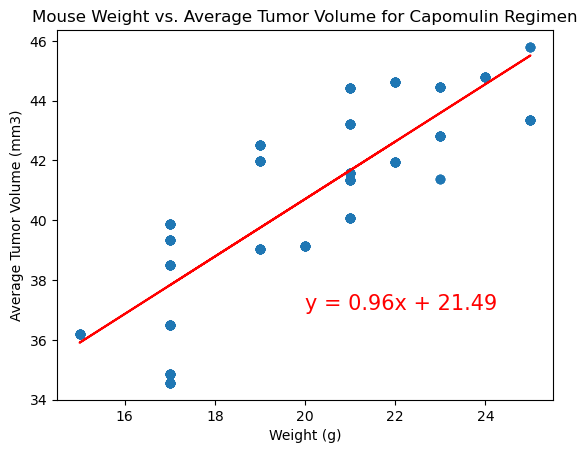

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Select data for Capomulin regimen
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin", :]

# Calculate the average tumor volume for each mouse on Capomulin
avg_tumor_vol = pd.DataFrame(capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

# Merge average tumor volume data with mouse weight data
merged_data_weight = pd.merge(avg_tumor_vol, capomulin_data[["Mouse ID", "Weight (g)"]], on="Mouse ID")

# Calculate correlation coefficient
correlation = st.pearsonr(merged_data_weight["Weight (g)"], merged_data_weight["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and average tumor volume for Capomulin is {round(correlation,2)}")

# Perform linear regression
x_values = merged_data_weight["Weight (g)"]
y_values = merged_data_weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Plot the scatter plot with the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()
